In [ ]:
# We will dive into Linear Classification using Logistic Regression 


In [ ]:
# Firstly let import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
print(sklearn.__version__)


0.21.2


In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
from sklearn.metrics import accuracy_score


In [ ]:
# Read CSV file Which has only 2 classes to classify

In [16]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

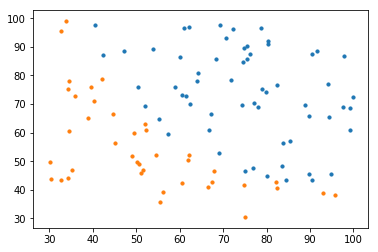

In [67]:
    data = load_data("marks.txt", None)
    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]
    # y = target values, last column of the data frame
    y = data.iloc[:, -1]
    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]
    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,label='Not Admitted')


In [68]:
# preparing the data for building the model
# here X data was on data frame which logically is in 100X2 matrix .
# To ideally use the data we have to convert it into 100X2 matrix in which each tuple represents a sample
x_train = np.c_[np.ones((X.shape[0], 1)), X]
y_train = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [54]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))
def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)
def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [55]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost
def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [60]:
from scipy import linalg, optimize

In [63]:
def fit( x, y, theta):    
    opt_weights = optimize.fmin_tnc(func=cost_function, x0=theta,fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(x, y, theta)

TypeError: cost_function() missing 1 required positional argument: 'y'

In [121]:
x_train

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [114]:
lg = LogisticRegression()
lg.fit(x_train,y_train.ravel())

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
parameters =lg.coef_[0]

In [125]:
print(lg.predict([[1,55,65]]))
print(parameters)
print(y_train)

[1]
[-2.85831439  0.05214733  0.04531467]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


[25.05882244669796, 103.86943574220612]


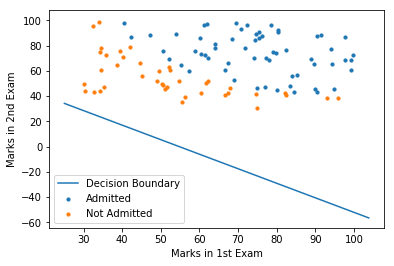

In [124]:
x_values = [np.min(x_train[:, 1] - 5), np.max(x_train[:, 2] + 5)]
print(x_values)
y_values =  -((parameters[0] + np.dot(parameters[1], x_values)) / parameters[2])
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,label='Not Admitted')

plt.legend()
plt.show()